<a href="https://colab.research.google.com/github/raziyasultan/AI_ML_internship/blob/main/Task3_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Modules**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Connecting drive and google colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')

In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Interquartile Range (IQR):**

**The interquartile range is a measure of statistical dispersion, or in simple terms, it represents the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). Mathematically, IQR = Q3 - Q1. The IQR is less sensitive to outliers than the range and provides a more robust measure of variability.**

**Range**  is the difference between the maximum and minimum values and provides a broad sense of the spread of the entire dataset. However, it can be heavily influenced by outliers.

**Interquartile Range (IQR)** focuses on the middle 50% of the data, making it less sensitive to extreme values. It is a robust measure of variability and is particularly useful when the dataset contains outliers.


In [56]:
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.50)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print("\nFirst Quartile (Q1):", Q1)
print("\nSecond Quartile (Q2):" ,Q2)
print("\nThird Quartile (Q3):" ,Q3)
print("\nInterquartile Range (IQR) for age is :", IQR)


First Quartile (Q1): 32.0

Second Quartile (Q2): 37.0

Third Quartile (Q3): 44.0

Interquartile Range (IQR) for age is : 12.0


**Boxplot -** The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The length of the box thus spans the middle 50% of the data. The line inside the box represents the median (Q2).

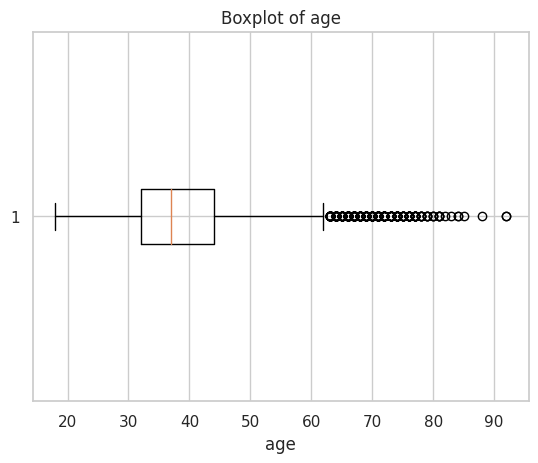

In [58]:
plt.boxplot(df['age'],vert= False)
plt.title('Boxplot of age')
plt.xlabel('age')
plt.show()


**In this boxplot we are having outliers which are the data points that are lying outside of maximum values. Usually outliers are the datapoints which lies outside of the minimum and maximum range**

**Skewness:**

**Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. A negative skewness indicates that the distribution of the data is skewed to the left (tail on the left side is longer or fatter), while a positive skewness indicates a skew to the right (tail on the right side is longer or fatter). The skewness value can range from negative infinity to positive infinity, with zero indicating a perfectly symmetrical distribution.**

In [59]:
from scipy import stats
skewness = stats.skew(df['age'])
print("\nSkewness:", round(skewness,4))


Skewness: 1.0112


**As the skew ness is positive we can say that it is skewed to the right side(positive skewness).This can also be observed from the boxplot as the length of whiskers is more in right side. This can also be observed using quartile differences alse.**

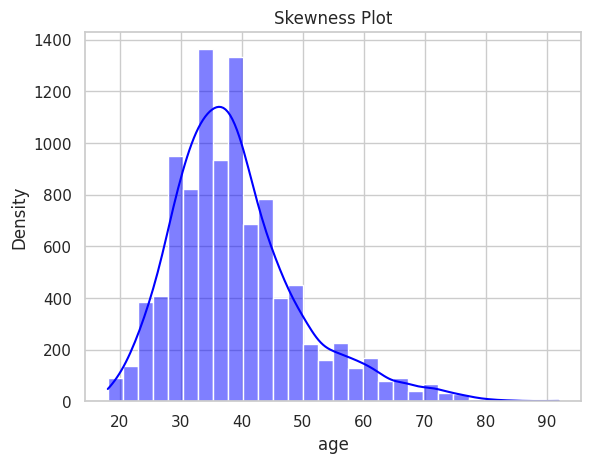

In [60]:
sns.histplot(df['age'], kde=True, color='blue', bins=30)
plt.xlabel('age')
plt.ylabel('Density')
plt.title('Skewness Plot')

plt.show()

**Kurtosis:**

**Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. It describes the shape of the distribution's tails in relation to the normal distribution. Positive kurtosis (leptokurtic) indicates it is having peake more than the normal distribution, while negative kurtosis (platykurtic) indicates it is flatened than normal distribution . A kurtosis of 0 (mesokurtic) implies that it is similar to a normal distribution.**

In [61]:
kurtosis = stats.kurtosis(df['age'])
print("Kurtosis:", round(kurtosis,4))

Kurtosis: 1.394


**As the value is positive it is leptokurtic**

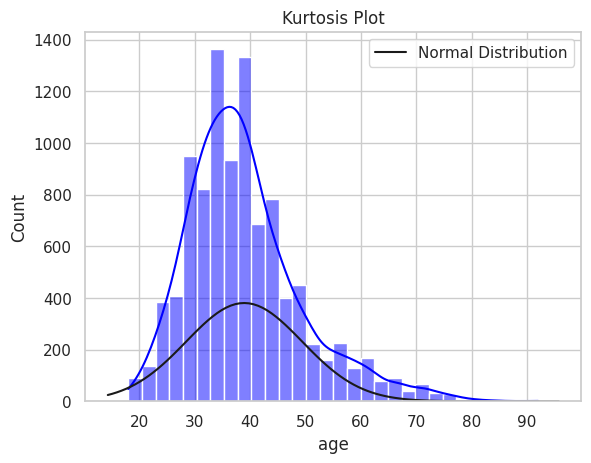

In [64]:
sns.histplot(df['age'], kde=True, color='blue', bins=30)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, np.mean(df['age']), np.std(df['age']))
plt.plot(x, y * len(df['age']) * np.diff(np.unique(df['age']))[0], 'k',label='Normal Distribution')
plt.title('Kurtosis Plot')
plt.legend()
plt.show()

**In the above plot black color curve indicates normal distribution curve and blu color curve indicates leptokurtic peaked curve than normal curve as the value is positive**
